In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
appointment = pd.read_csv("KaggleV2-May-2016.csv")

In [3]:
appointment = appointment.rename(columns={'No-show' : 'NS'})
appointment['AppointmentDay'] = appointment.AppointmentDay.apply(np.datetime64)
appointment['ScheduledDay'] = appointment.ScheduledDay.apply(np.datetime64)

In [4]:
appointment

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NS
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [5]:
appointment = appointment.assign(daydiff=(abs(appointment.AppointmentDay - appointment.ScheduledDay) / np.timedelta64(1, 'D')).astype(int))

In [6]:
def plot_cont(appointment, category):
    temp = pd.crosstab(index = appointment[category], columns = appointment.NS).reset_index()
    temp = temp[temp.No + temp.Yes > 20]
    temp['prob'] = temp['No'] / (temp['No'] + temp['Yes'])
    plt.figure(figsize=(50, 20), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(temp[category], temp['prob'])
    plt.show()

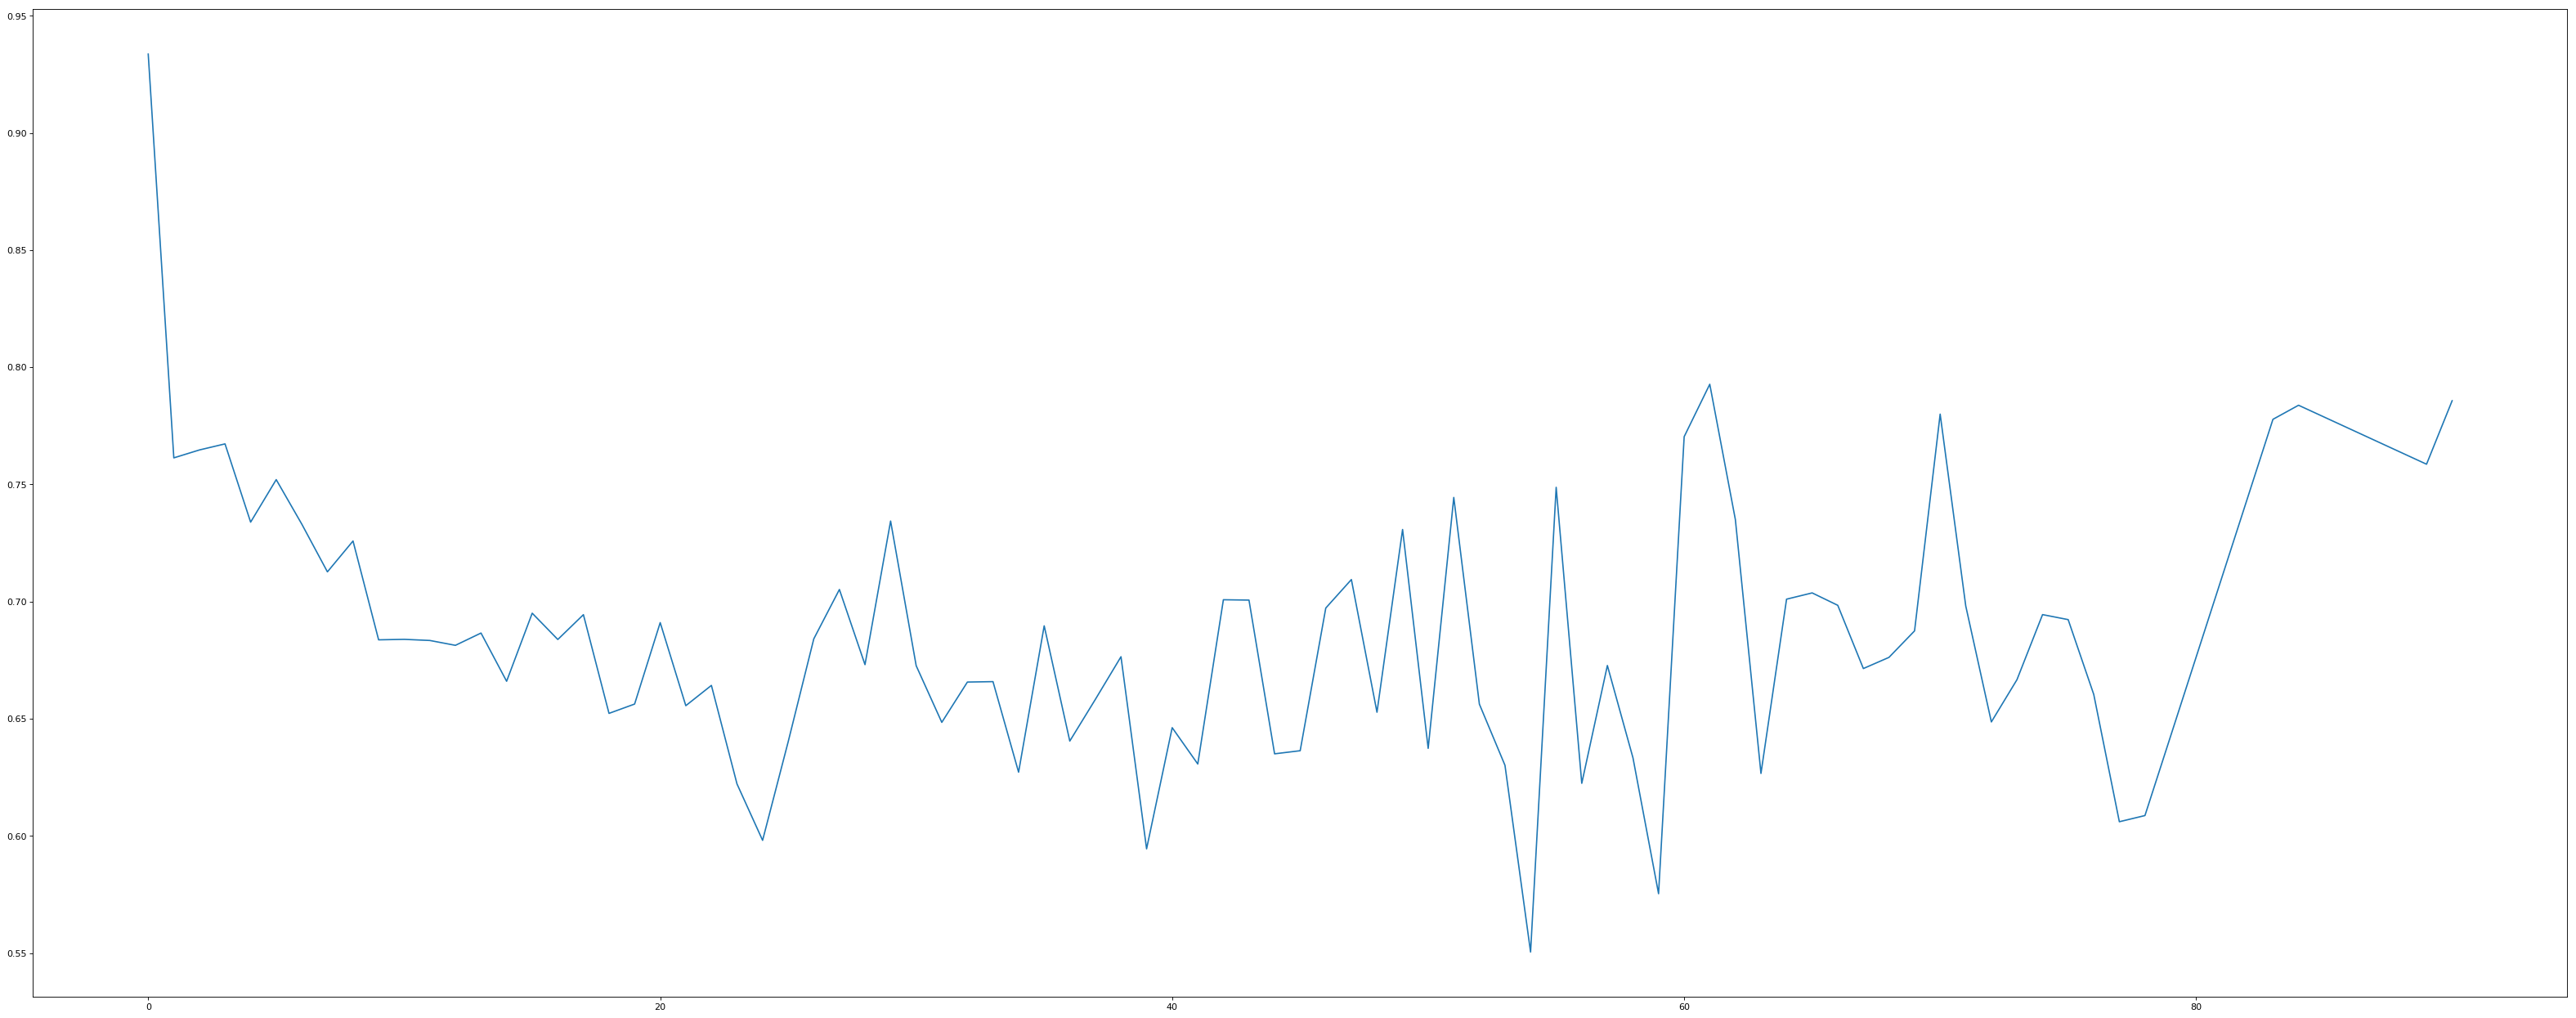

In [7]:
plot_cont(appointment, 'daydiff')

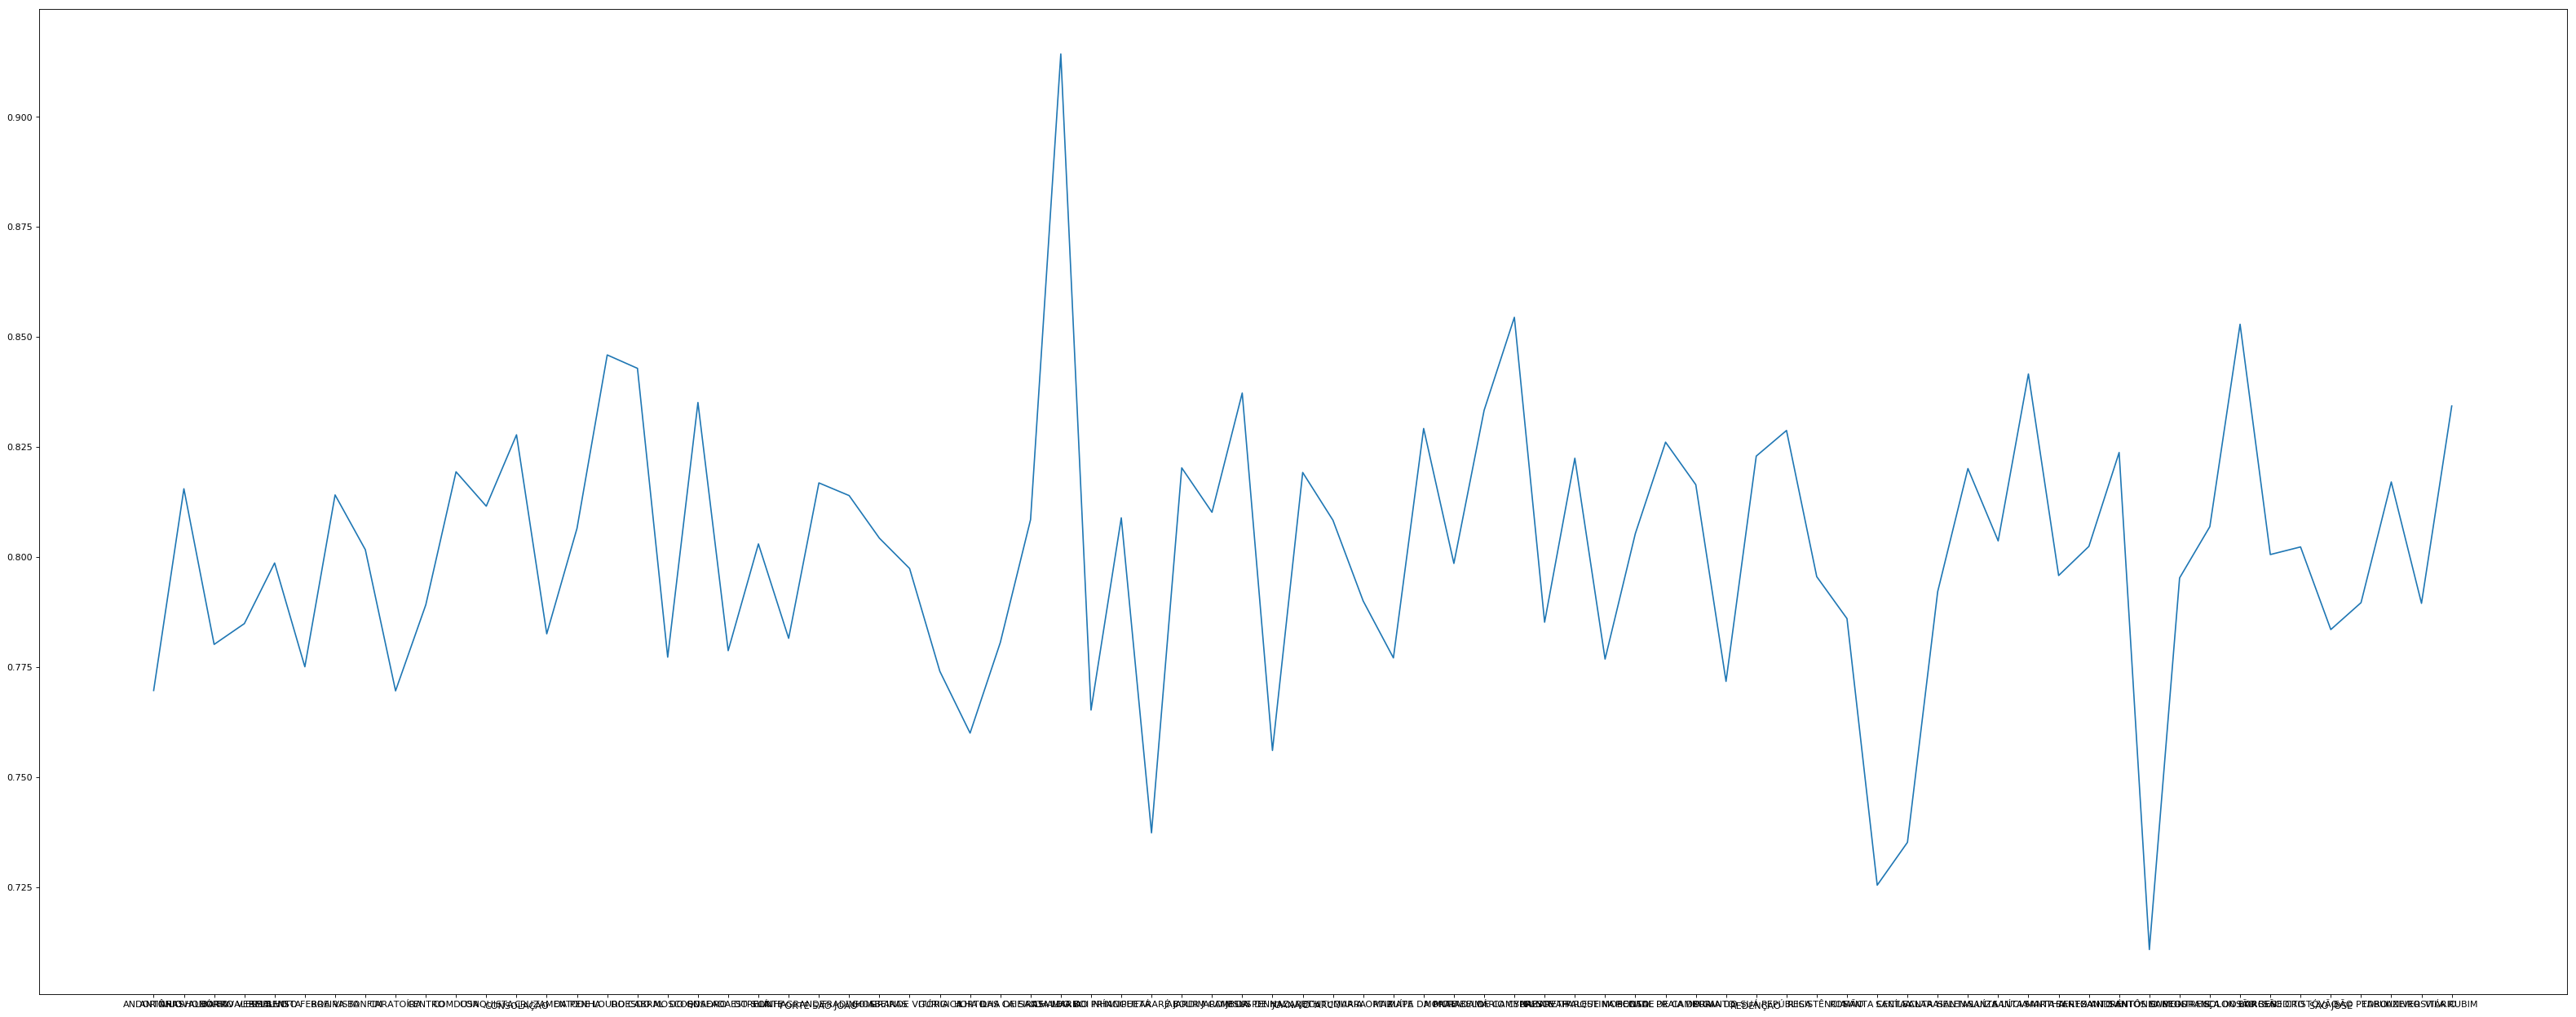

In [8]:
plot_cont(appointment, 'Neighbourhood')

In [15]:
def plot_caterogies(appointment, category, flag=2, var1='No', var2='Yes'):
    temp = pd.crosstab(index = appointment[category], columns = appointment.NS).reset_index()
    if flag == 1:
        temp[category] = temp[category].astype(str)
        temp.at[0, category] = var1
        temp.at[1, category] = var2
    elif flag == 2:
        plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
    temp['prob'] = temp['No'] / (temp['No'] + temp['Yes'])
    plt.bar(temp[category], temp['prob'])
    plt.show()

Scholarship


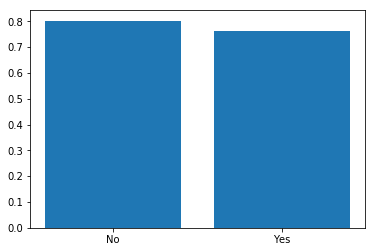

Hipertension


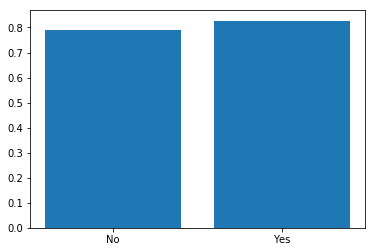

Diabetes


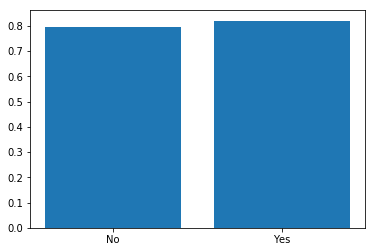

Alcoholism


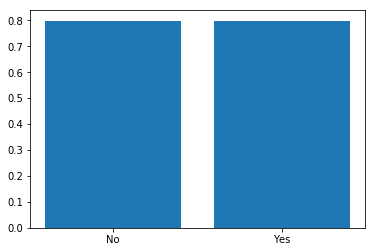

Handcap


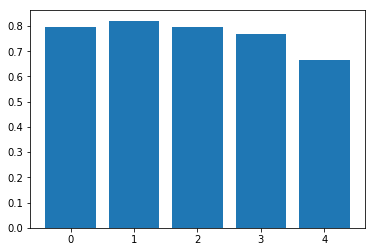

SMS_received


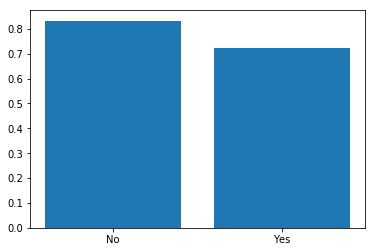

Gender


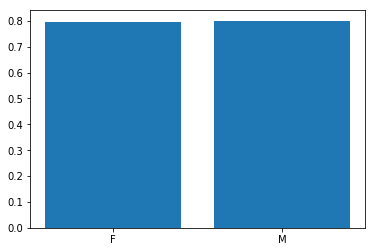

In [10]:
for item in appointment.columns[7:13]:
    print(item)
    if item == 'Handcap':
            plot_caterogies(appointment, item, 0)
    else:
        plot_caterogies(appointment, item, 1, 'No', 'Yes')
print('Gender')
plot_caterogies(appointment, 'Gender', 0, 'Female', 'Male')

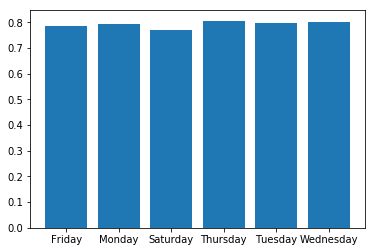

In [11]:
def getweekday(date):
    return calendar.day_name[date.weekday()]

appointment['DayOfWeek'] = appointment['AppointmentDay'].apply(getweekday)
plot_caterogies(appointment, 'DayOfWeek', 0)

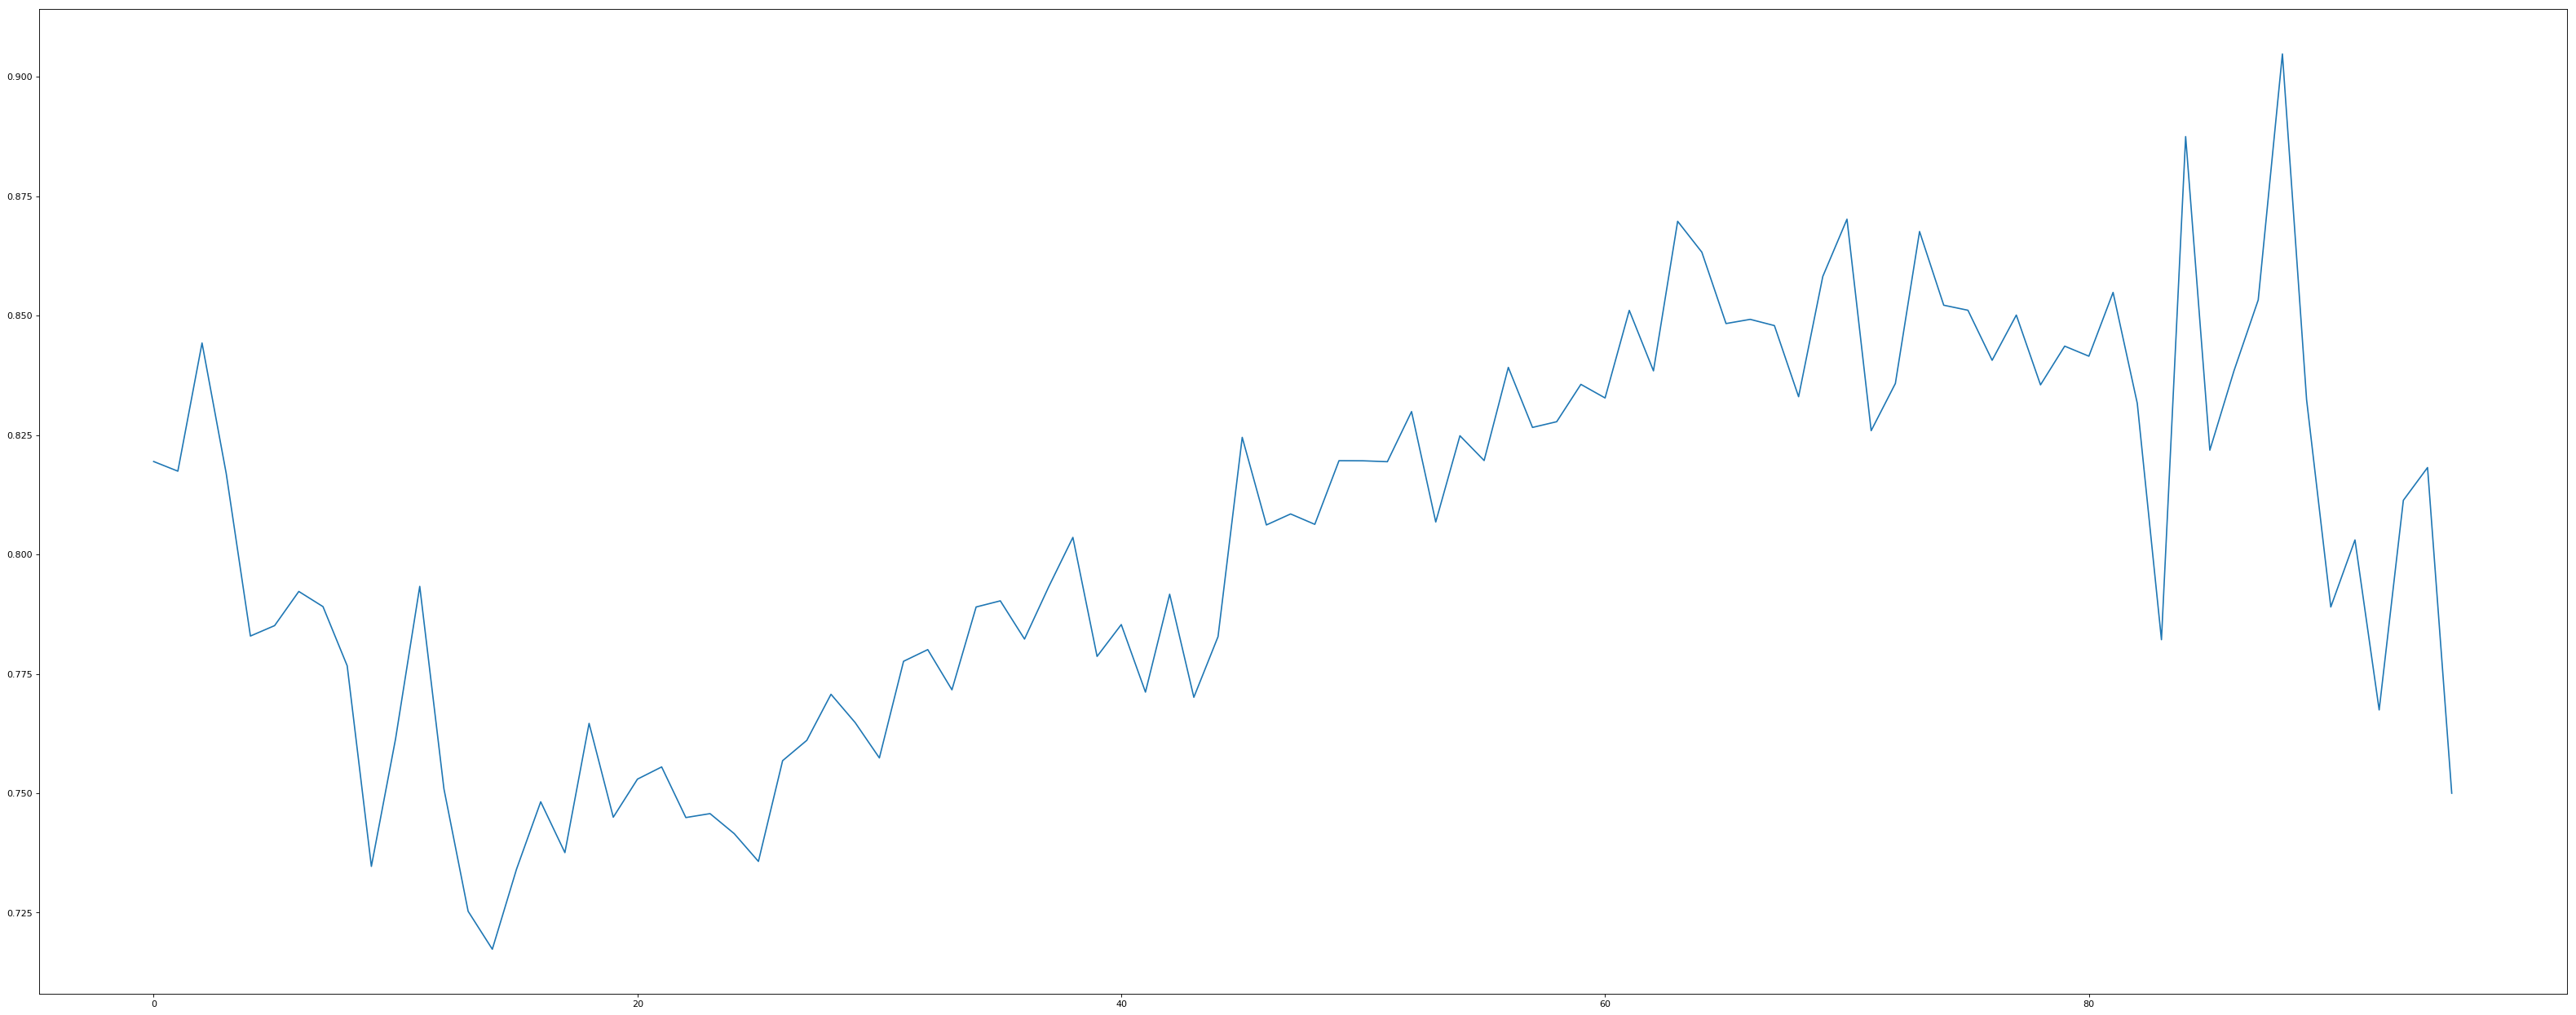

In [12]:
plot_cont(appointment, 'Age')

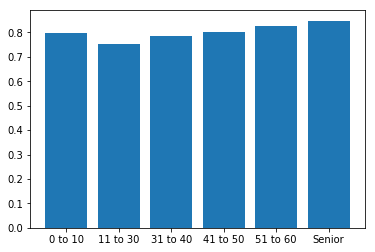

In [13]:
def getagecategory(age):
    if 0 <= age <=10:
        return '0 to 10'
    elif 10 < age <=30:
        return '11 to 30'  
    elif 30 < age <=40:
        return '31 to 40'
    elif 40 < age <= 50:
        return '41 to 50'
    elif 50 < age <= 60:
        return '51 to 60'
    else:
        return 'Senior'
appointment['AgeBuckets'] = appointment['Age'].apply(getagecategory)
plot_caterogies(appointment, 'AgeBuckets', 0)

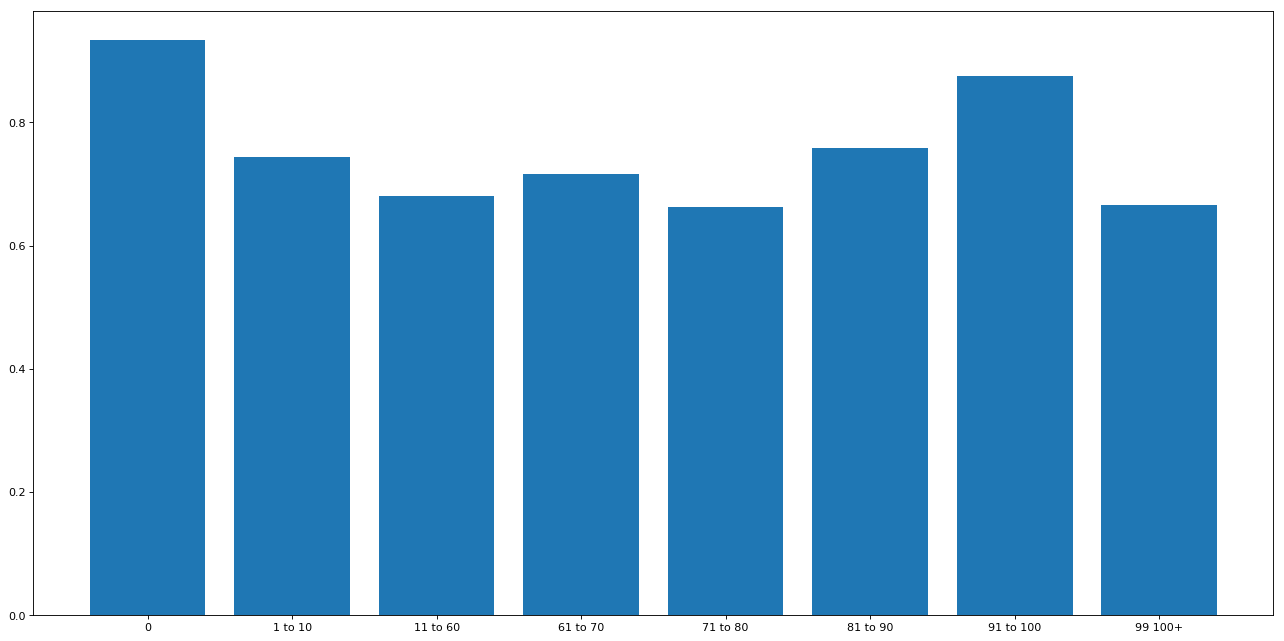

In [33]:
def getdaycategory(days):
    if days == 0:
        return '0'
    elif   0 < days <=10:
        return '1 to 10'
    elif 10< days <=20:
        return '11 to 60'
    elif 60< days <=70:
        return '61 to 70'
    elif 70< days <=80:
        return '71 to 80'
    elif 80< days <=90:
        return '81 to 90'
    elif 90< days <=100:
        return '91 to 100'
    else:
        return '99 100+'
appointment['DayDiffBucket'] = appointment['daydiff'].apply(getdaycategory)
plot_caterogies(appointment, 'DayDiffBucket')

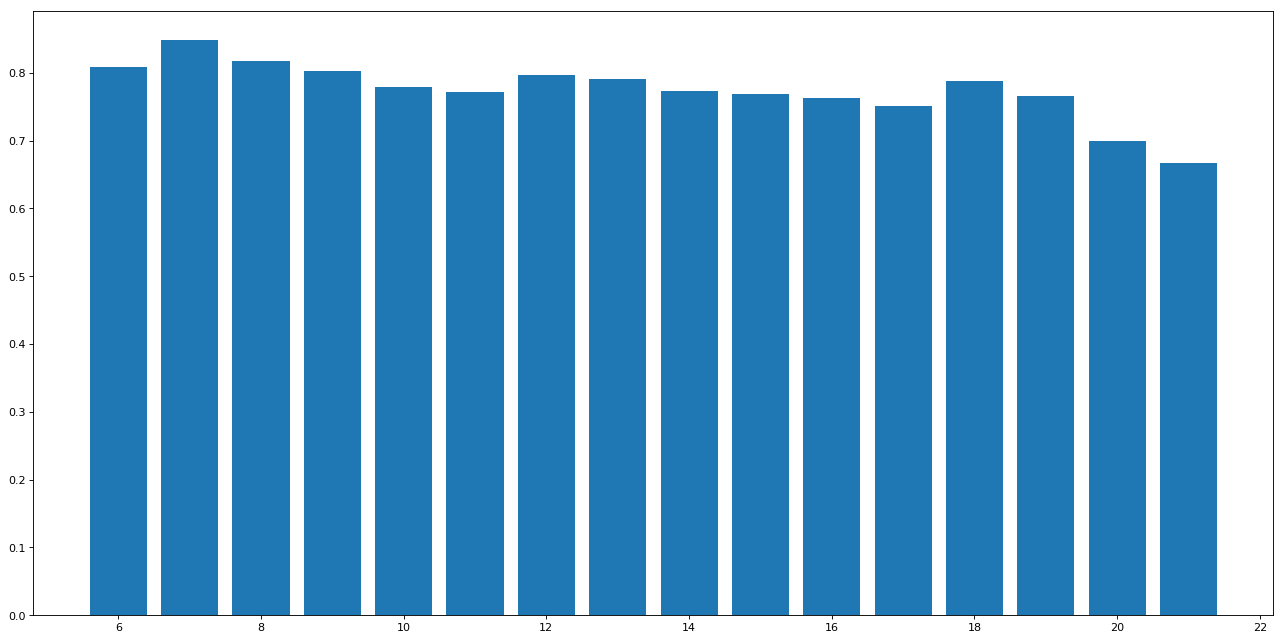

In [32]:
appointment['Hour'] = pd.DatetimeIndex(appointment.ScheduledDay).hour
plot_caterogies(appointment, 'Hour')

In [15]:
N = pd.get_dummies(appointment['Neighbourhood'],prefix='Neighbourhood', drop_first=True)
DW = pd.get_dummies(appointment['DayOfWeek'],prefix='', drop_first=True)
AB = pd.get_dummies(appointment['AgeBuckets'],prefix='AgeGroup', drop_first=True)
DDB = pd.get_dummies(appointment['DayDiffBucket'],prefix='DayGroup', drop_first=True)
OneHotEncodedCats = pd.concat([N, DW, AB, DDB], axis=1)

del N, DW, AB, DDB

appointment_new = appointment[['Gender', 'Age', 'Scholarship',
                              'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 
                                'daydiff']]

appointment_new = pd.concat([appointment_new, OneHotEncodedCats], axis=1)


sc_age = StandardScaler()
appointment_new['Age'] = sc_age.fit_transform(appointment_new['Age'].reshape(-1,1))

sc_age = StandardScaler()
appointment_new['daydiff'] = sc_age.fit_transform(appointment_new['daydiff'].reshape(-1,1))

appointment_new['Gender'] = appointment['Gender'].apply(lambda x: 0 if x=='F' else 1)
appointment_new['Target'] = appointment['NS'].apply(lambda x: 0 if x=='No' else 1)

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [16]:
def model(X, Y):
    train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=42)
    lr = LogisticRegression()
#     lr.fit(train_x, train_y)
#     print(lr.score(test_x, test_y))
    scores = cross_val_score(lr, X, Y, cv=5)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [17]:
np_appointment_1 = appointment_new.iloc[:, 0:94].values
np_appointment_1_Y = appointment_new.iloc[:, 106].values
model(np_appointment_1, np_appointment_1_Y)

[0.79598299 0.79643536 0.77277662 0.79434517 0.79741223]
Accuracy: 0.79 (+/- 0.02)


In [18]:
np_appointment_2 = pd.concat([appointment_new.iloc[:, 0],
                                appointment_new.iloc[:, 2:8],
                                    appointment_new.iloc[:, 9:105]], axis = 1).values
np_appointment_2_Y = appointment_new.iloc[:, 106].values
model(np_appointment_2, np_appointment_2_Y)

[0.79779245 0.79734009 0.79616394 0.79728568 0.79772892]
Accuracy: 0.80 (+/- 0.00)


In [19]:
np_appointment_3 = pd.concat([appointment_new.iloc[:, 0:9],
                                appointment_new.iloc[:, 89:94]], axis = 1).values
np_appointment_3_Y = appointment_new.iloc[:, 106].values
model(np_appointment_3, np_appointment_3_Y)

[0.79670678 0.79711391 0.77847643 0.79642615 0.79777416]
Accuracy: 0.79 (+/- 0.01)


In [20]:
np_appointment_4 = pd.concat([appointment_new.iloc[:, 0],
                                appointment_new.iloc[:, 2:8],
                                    appointment_new.iloc[:, 89:105]], axis = 1).values
np_appointment_4_Y = appointment_new.iloc[:, 106].values
model(np_appointment_4, np_appointment_4_Y)

[0.79815435 0.79806387 0.79715914 0.79791902 0.79818132]
Accuracy: 0.80 (+/- 0.00)
